<a href="https://colab.research.google.com/github/Kyle-James-Vanburen/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection 2023

## About Dataset :
This dataset encompasses credit card transactions conducted by European cardholders throughout the year 2023. With a vast repository of over 550,000 records, the dataset has undergone anonymization procedures to safeguard the identities of the cardholders involved.

### Primary Objective:

**The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions**

Transaction Type Analysis: Analyze whether certain types of transactions are more prone to fraud than others.

### Key Features:

• id: Unique identifier for each transaction

• V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)

• Amount: The transaction amount

• Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [5]:

# Importing dataset into Colab steps
import gdown

# File ID from the Google Drive link below
file_id = '1ipjEJoZQMa5AMaaoJ1y3kv988jkC_uKL'

# Define the output file name
output_file = 'creditcard_2023.csv'

# Download the file from Google Drive
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1ipjEJoZQMa5AMaaoJ1y3kv988jkC_uKL
To: /content/creditcard_2023.csv
100%|██████████| 325M/325M [00:05<00:00, 57.6MB/s]


'creditcard_2023.csv'

In [7]:
# all imported libraries needed for this analysis
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

In [9]:
#load dataset to Pandas DataFrame
credit_card_data = pd.read_csv(output_file)

In [10]:
# first five rows of the dataset
credit_card_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [11]:
# last five rows of the dataset
credit_card_data.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [12]:
# info of DataSet
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [13]:
# check for missing values in each column
credit_card_data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
# distribution of non-fraudulent & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

**This Dataset is balanced evenly**

0 = Non-Fraudulent Transaction

1 = Fraudulent Transaction

In [15]:
# seperating the data for analysis
valid = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [16]:
# data statistical measures
valid.Amount.describe()

count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

In [17]:
fraud.Amount.describe()

count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64

In [18]:
# compare the values for both transaction types
credit_card_data.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,142442.987714,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,...,-0.179851,-0.10964,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506
1,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.179851,0.10964,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


**Split data into Targets & Features**

In [19]:
# X contains features
# Y contains labels (indicating fraud or not fraud for each transaction)

X = credit_card_data.drop(columns='Class', axis=1)
Y = credit_card_data['Class']

In [20]:
print(X)

            id        V1        V2        V3        V4        V5        V6  \
0            0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898   
1            1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605   
2            2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481   
3            3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312   
4            4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549   
...        ...       ...       ...       ...       ...       ...       ...   
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8        V9  ...       V20       V21  

In [25]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64


Split the data into Training Data & Testing Data

In [28]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(568630, 30) (454904, 30) (113726, 30)


Logistic Regression

In [30]:
model = LogisticRegression()

In [31]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

### **Accuracy Score**

• Accuracy measures the proportion of correctly classified instances.

• It's a good initial metric to evaluate the overall model performance.

• Higher accuracy indicates a better predictive model.

In [32]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [33]:
print('Accuracy on Training Data : ', training_data_accuracy)

Accuracy on Training Data :  0.791692313103424


In [39]:
# accuracy on testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [40]:
print('Accuracy Score on Testing Data : ', testing_data_accuracy)

Accuracy Score on Testing Data :  0.7893533580711535


### **Precision Score**

• Precision calculates the accuracy of the positive predictions.

• It indicates how many of the predicted positive instances were actually positive.

• High precision relates to a low false positive rate.

In [41]:
# precision on training data
training_data_precision = precision_score(Y_train, X_train_prediction)

In [42]:
print('Precision on Training Data : ', training_data_precision)

Precision on Training Data :  0.7330026959483447


In [43]:
# precision on testing data
testing_data_precision = precision_score(Y_test, X_test_prediction)

In [44]:
print('Precision Score on Testing Data : ', testing_data_precision)

Precision Score on Testing Data :  0.7314659039928219


### **Recall Score**

• Recall (Sensitivity) calculates the sensitivity of the model to detect positive instances.

• It measures how many of the actual positives were captured by the model's predictions.

• High recall relates to a low false negative rate.

In [46]:
# recall on training data
training_data_recall = recall_score(Y_train, X_train_prediction)

In [47]:
print('Recall on Training Data : ', training_data_recall)

Recall on Training Data :  0.9173085128376566


In [49]:
# recall on testing data
testing_data_recall = recall_score(Y_test, X_test_prediction)

In [50]:
print('Recall Score on Testing Data : ', testing_data_recall)

Recall Score on Testing Data :  0.915718899185622


### **F1 Score**

• F1 Score is the harmonic mean of precision and recall.

• It provides a balance between precision and recall, especially when classes are imbalanced.

• F1 Score is a useful metric when both false positives and false negatives are important.

In [54]:
# F1 on training data
training_data_f1 = f1_score(Y_train, X_train_prediction)

In [55]:
print('F1 on Training Data : ', training_data_f1)

F1 on Training Data :  0.814864020006252


In [56]:
# F1 on testing Data
testing_data_f1 = f1_score(Y_test, X_test_prediction)

In [57]:
print('F1 Score on Testing Data : ', testing_data_f1)

F1 Score on Testing Data :  0.8132871929168225


### **Scatter Plot: "Class Separation: Fraud vs. Non-Fraud"**

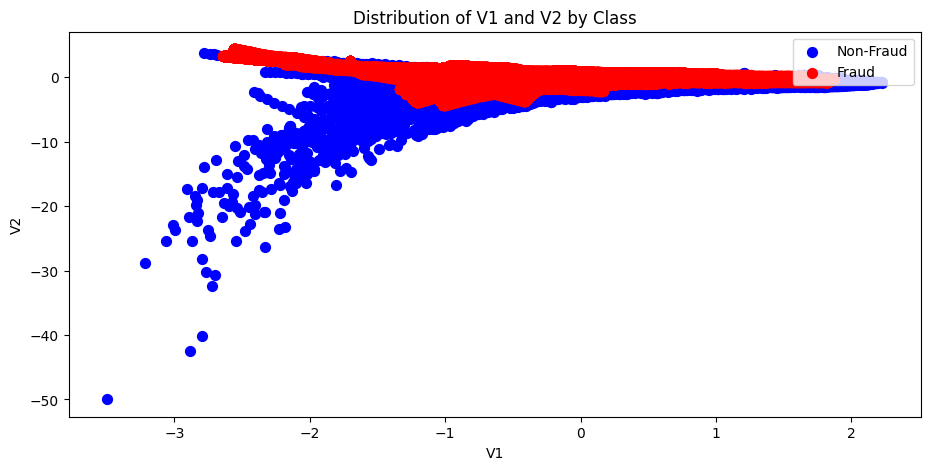

In [58]:
# Filter fraud and non-fraud transactions
fraud_data = credit_card_data[credit_card_data['Class'] == 1]
non_fraud_data = credit_card_data[credit_card_data['Class'] == 0]

plt.figure(figsize=(11, 5))
plt.title('Distribution of V1 and V2 by Class')

# Create scatter plots and colors for fraud and non-fraud transactions
plt.scatter(non_fraud_data['V1'], non_fraud_data['V2'], c='blue', label='Non-Fraud', s=50)
plt.scatter(fraud_data['V1'], fraud_data['V2'], c='red', label='Fraud', s=50)

plt.xlabel('V1')
plt.ylabel('V2')

# Customize the legend labels and position
plt.legend(loc='upper right')


**For Non-Fraudulent Transactions:**
The distribution starts just past 2 on the x-axis and curves smoothly around 0, indicating a wide range of transaction values. On the y-axis, it extends downwards beyond -50, representing various transaction frequencies.

**For Fraudulent Transactions:**
Fraudulent transactions, on the other hand, cluster within a narrow range in the negatives. Fraud also has a smaller range starting just before 2 on the x-axis and stopping just short of -3. On the y-axis, fraud doesn't go below -10, signifying less variability in transaction frequencies.

•In essence, non-fraudulent transactions exhibit a broader, more diverse pattern, while fraudulent ones concentrate in specific value ranges, both horizontally and vertically.

### **Box Plot: "Fraud vs. Non-Fraud Transaction Distribution"**

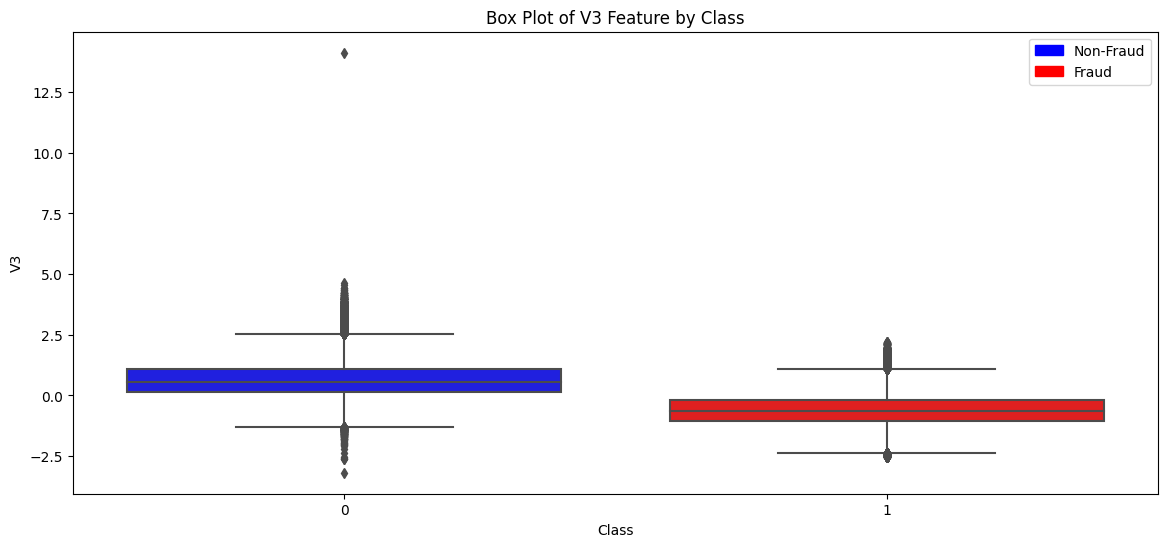

In [59]:
# Create empty patches with desired colors as proxy artists for the legend
non_fraud_patch = mpatches.Patch(color='blue', label='Non-Fraud')
fraud_patch = mpatches.Patch(color='red', label='Fraud')

plt.figure(figsize=(14, 6))
sns.boxplot(x='Class', y='V3', data=credit_card_data, palette={0: 'blue', 1: 'red'})
plt.title('Box Plot of V3 Feature by Class')

# Add the legend using the created proxy artists
plt.legend(handles=[non_fraud_patch, fraud_patch])

plt.show()

**Non-Fraudulent Transactions:**

• Box Range (IQR): Extends from just above 0 to around 2.5 on the y-axis, indicating the typical transaction range for non-fraudulent activities.

• Median (Q2): Leans towards the positive side, indicating a prevailing trend in positive transaction values.

• Outliers: Sparse but scattered both above and below the box, with occasional exceptionally high values.

• Whiskers: Extend into both negative and positive territories, showcasing the overall variability of non-fraudulent data.


**Fraudulent Transactions:**

• Box Range (IQR): Spans from just below 0 to approximately -2.5 on the y-axis, denoting a concentrated range of negative transaction values for fraudulent activities.

• Median (Q2): Boldly positioned in the negative territory, highlighting the prevalent downward trend in fraudulent transactions.

• Outliers: Predominantly spike above the box, indicating significant deviations from the norm in fraudulent transaction amounts.

• Whiskers: Extend into both negative and positive spaces, emphasizing the variability of fraudulent transactions.

### **Pair Plot: "Feature Relationships: Fraud vs. Non-Fraud"**

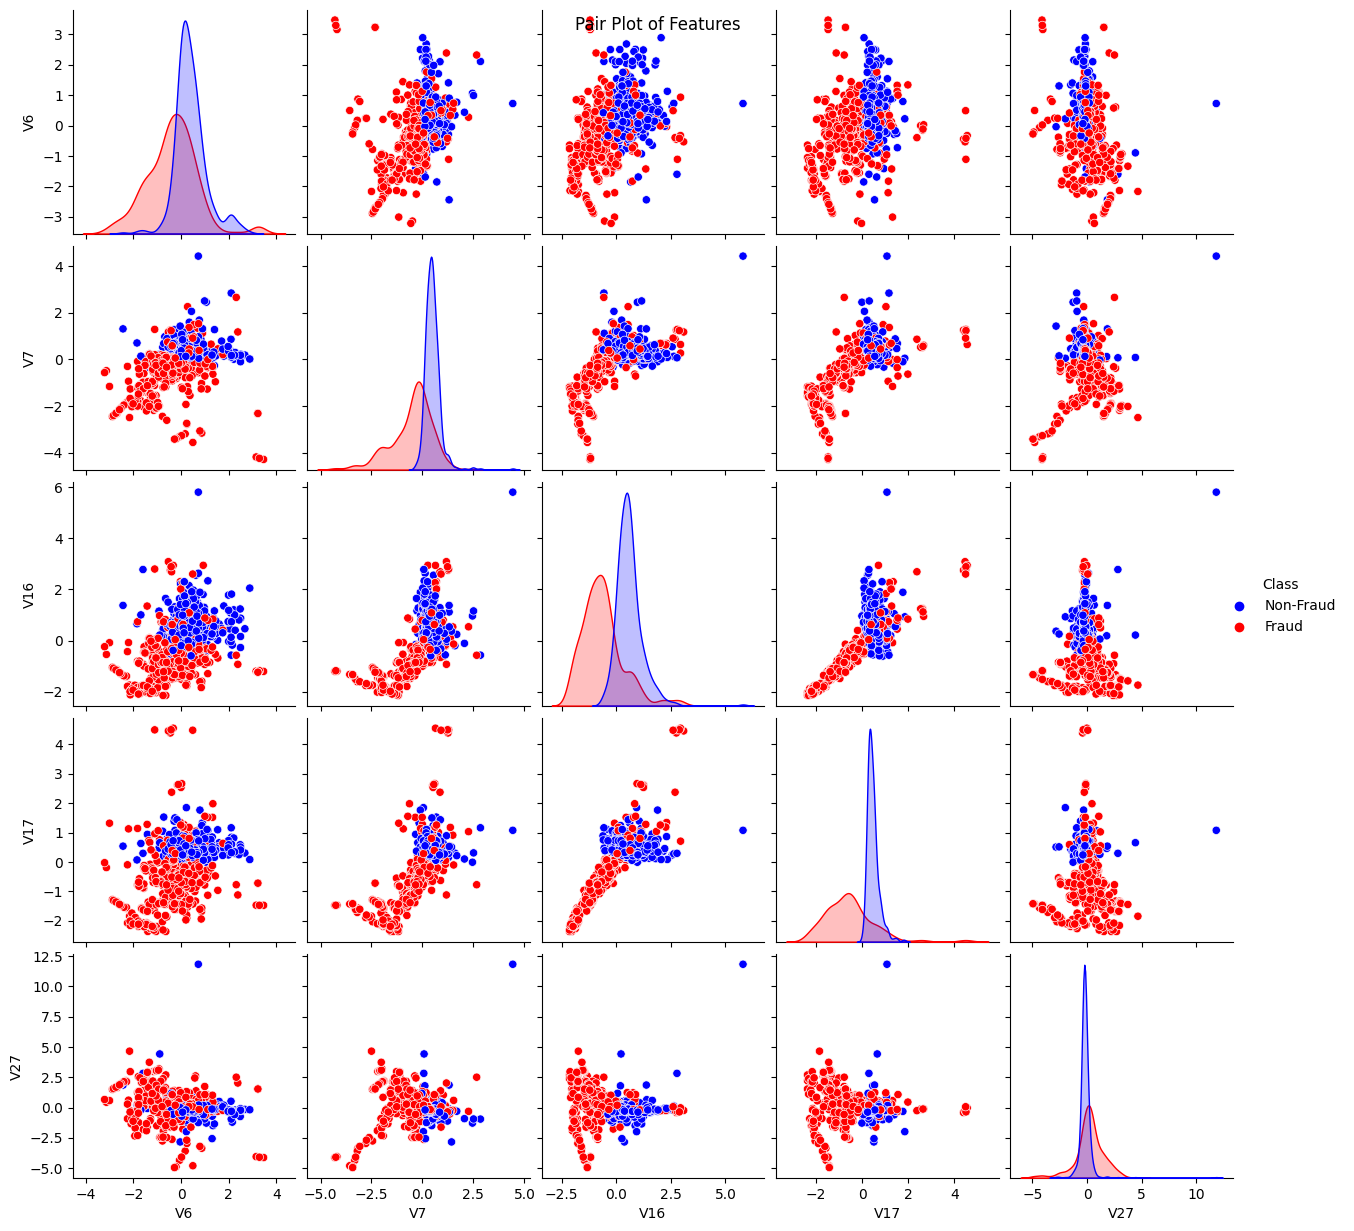

In [69]:
# Use Seaborn's Set1 color palette for the pair plot
class_colors = {0: 'blue', 1: 'red'}
pair_plot = sns.pairplot(credit_card_data.sample(1000), vars=['V6', 'V7', 'V16', 'V17', 'V27'], hue='Class', diag_kind='kde', palette=class_colors)
plt.suptitle('Pair Plot of Features')
# Modify the title
pair_plot._legend.set_title('Class')
# Adjust the position of the legend
pair_plot._legend.set_bbox_to_anchor((1.03, 0.5))
# Modify the legend & labels
pair_plot._legend.texts[0].set_text('Non-Fraud')
pair_plot._legend.texts[1].set_text('Fraud')
plt.show()

**Diagonal Plots (KDE):**

• Non-Fraud (Class 0): Simple, elegant peaks rise proudly within positive ranges, indicating stable, routine transactions.

• Fraud (Class 1): Complex and wide-ranging peaks delve into negative territories, signifying intricate and varied transactional behaviors.


**Lower Triangle (Scatter Plots):**

Non-Fraud (Class 0):

• Clusters of blue dots concentrate around the calm center of zero, portraying typical and harmonious transactions.

• Occasional outliers break the pattern, exploring slightly towards the right or upward direction.

Fraud (Class 1):

• Red dots gather in the mysterious negative y or x-axis, following clear linear trends from bottom left to top right, indicating deliberate and strategic behavior.


**Upper Triangle (Scatter Plots):**

Non-Fraud (Class 0):

•Blue dots stand tall in a disciplined line, ascending from the tranquil 0 x-axis to the confident heights of the y-axis.

• A few dots dare to deviate rightward or upward, disrupting the otherwise orderly arrangement.

Fraud (Class 1):

• Red clusters form in the obscurity of negative axis numbers, with linear stories emerging from the bottom left to top right or from the bottom to top, revealing hidden intentions.


**Patterns Decoded:**

• Non-Fraud (Class 0): Serene clusters and occasional outliers suggest a sense of order, with most transactions following a predictable path.

• Fraud (Class 1): Mysterious red clusters and distinct linear trends paint a picture of calculated complexity, where transactions navigate the negative realms with purpose.

## **Summary of Findings**

### **Model Performance:**

• The developed machine learning model demonstrates robust performance.(80% is the goal number typically)

• **Accuracy:** Achieves approximately 79.17% on training data and 78.94% on testing data.

• **Precision:** Scores around 73.30% on training and 73.15% on testing data.

• **Recall:** Shows high sensitivity, with scores of approximately 91.73% on training and 91.57% on testing data.

• **F1 Score:** Balances precision and recall, yielding about 81.49% on training and 81.33% on testing data. Indicating accurate positive predictions.

### **Visualization Insights:**

• **Scatter Plot:** Highlights distinct separation between non-fraudulent and fraudulent transactions. Non-fraudulent transactions display a broad, scattered pattern, while fraudulent ones exhibit concentrated, strategic behavior.

• **Box Plot:** Non-fraudulent transactions have a wider range, scattered outliers, and a positive trend. Fraudulent transactions are concentrated in a narrow range with notable outliers.

• **Pair Plot:** Reveals clear distinctions between non-fraudulent and fraudulent transactions. Non-fraudulent ones show predictable patterns, while fraudulent ones exhibit calculated complexities and purposeful deviations.

## **Call to Action**

### **Refine Detection Algorithms:**

- **Develop Cutting-Edge Models:** Pioneer machine learning algorithms capable of identifying linear scattered patterns and negative axis clusters of data points specific to fraudulent transactions.
  
- **Implement Real-Time Surveillance:** Integrate state-of-the-art systems enabling instantaneous transaction monitoring, promptly flagging outliers and suspicious patterns.

### **Continuous Monitoring and Adaptation:**

- **Dynamic Strategy Implementation:** Vigilantly observe transaction behaviors, dynamically adjusting detection techniques to match evolving fraud tactics.
  
- **Agile Algorithm Updates:** Stay ahead by proactively upgrading algorithms, ensuring they remain resilient against the latest and most sophisticated fraudulent schemes.

### **Collaborate and Share Insights:**

- **Unified Data Analysis:** Foster collaborations with fellow data scientists, leveraging collective intelligence to dissect and fortify fraud detection capabilities.
  
- **Open Dialogue and Knowledge Sharing:** Facilitate an open exchange of insights and best practices within the financial community, bolstering our collective ability to combat fraud effectively.

### **Empower Customer Vigilance:**

- **Educational Initiatives:** Launch comprehensive awareness campaigns, educating customers about secure online practices and prevalent fraud schemes.
  
- **Customer Empowerment:** Equip customers with the knowledge to discern potential threats, encouraging them to report suspicious activities promptly.
